In [5]:
import random, pylab

# You are given this function
def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std

# You are given this class
class Die(object):
    def __init__(self, valList):
        """ valList is not empty """
        self.possibleVals = valList[:]
    def roll(self):
        return random.choice(self.possibleVals)

# Implement this -- Coding Part 1 of 2
def makeHistogram(values, numBins, xLabel, yLabel, title=None):
    """
      - values, a sequence of numbers
      - numBins, a positive int
      - xLabel, yLabel, title, are strings
      - Produces a histogram of values with numBins bins and the indicated labels
        for the x and y axis
      - If title is provided by caller, puts that title on the figure and otherwise
        does not title the figure
    """
    pylab.hist(values, bins=numBins)
    if title:
        pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    pylab.show()          


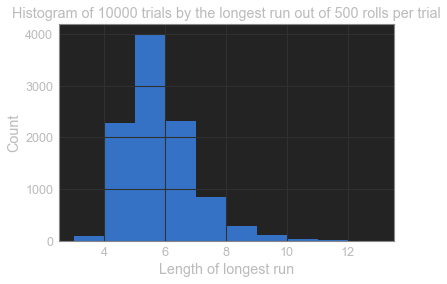

5.3198

In [72]:
# Implement this -- Coding Part 2 of 2

def longest_run(die, numRolls):
    """
    Find the longest streak (of identical rolls) from certain number of die rolls
    die: Die object, initialized with die values
    numRolls: num of rolls of the die
    Output: int of longest streak (of identical rolls) from numRolls rolls
    """
    first_roll = die.roll()
    roll_results = [first_roll]
    max_length = 1
    current_length = 1
    for roll in range(1, numRolls):
        roll_result = die.roll()
        # If roll result is the same as previous roll result, add one to current streak.
        # If current streak length is longer than the max streak length, then set the max streak length as the current streak length
        if roll_result == roll_results[-1]:
            current_length += 1
            if current_length > max_length:
                max_length = current_length
        # If roll result is different than the previous roll result, then reset the current streak length
        else:
            current_length = 1
        roll_results.append(roll_result)

    return max_length


def getAverage(die, numRolls, numTrials):
    """
      - die, a Die
      - numRolls, numTrials, are positive ints
      - Calculates the expected mean value of the longest run of a number
        over numTrials runs of numRolls rolls
      - Calls makeHistogram to produce a histogram of the longest runs for all
        the trials. There should be 10 bins in the histogram
      - Choose appropriate labels for the x and y axes.
      - Returns the mean calculated
    """
    longest_runs = [longest_run(die, numRolls) for trial in range(numTrials)]
    makeHistogram(longest_runs, 10, 'Length of longest run', 'Count', 'Histogram of {} trials by the longest '
                  'run out of {} rolls per trial'.format(numTrials, numRolls))
    average_longest_run = sum(longest_runs)/numTrials
    
    return average_longest_run

getAverage(Die([1,2,3,4,5,6,6,6,7]), 500, 10000)

In [71]:
help(pylab.xlim)

Help on function xlim in module matplotlib.pyplot:

xlim(*args, **kwargs)
    Get or set the *x* limits of the current axes.
    
    ::
    
      xmin, xmax = xlim()   # return the current xlim
      xlim( (xmin, xmax) )  # set the xlim to xmin, xmax
      xlim( xmin, xmax )    # set the xlim to xmin, xmax
    
    If you do not specify args, you can pass the xmin and xmax as
    kwargs, e.g.::
    
      xlim(xmax=3) # adjust the max leaving min unchanged
      xlim(xmin=1) # adjust the min leaving max unchanged
    
    Setting limits turns autoscaling off for the x-axis.
    
    The new axis limits are returned as a length 2 tuple.

